# DeepAR Methodology

##### Author information
- Name: Seungmin Jang
- email address: 22000624@handong.ac.kr
- GitHub: https://github.com/seungvo61

#### Part 1. Brief background of methodology
The DeepAR model is a very innovative technology that has applied deep learning techniques to time series prediction.  
Until the development of the DeepAR model, time series prediction used statistical-based models such as ARIMA (AutoRegressive Integrated Moving Average) or SARIMA (Seasonal ARIMA).

In time series prediction, the deep learning model is used as a better model than the statistical model, and the reason is explained in various ways.
1. First, is it possible to learn nonlinear patterns.  
    : Statistical models cannot learn nonlinear patterns, but deep learning models have the ability to learn nonlinear patterns. This is advantageous for modeling complex time series trends.
2. The second is the form of data.  
    : Statistical models generally assume regular and normal time series data, and even if not, they are made regular through preprocessing. However, deep learning models have the advantage of being applicable to abnormal time series data and multivariate time series data. Given a large amount of data, deep learning models can be trained to produce more accurate values.
3. The third is the parameter learning method.  
    : Unlike statistical models, deep learning models learn parameters through algorithms such as Gradient Descent. At this time, more calculations are carried out than statistical models, and training data that can be applied are required, but more complex time series patterns can be learned through this process.

The above differences show that the deep learning model has a stronger impact than the statistical model in the field of time series prediction, and DeepAR is an important model that started the deep learning model in the field of time series prediction.

The reason why this model appeared can be explained by the situation of a company called 'Amazon'.
Amazon uses a variety of time series data, such as selling a wide range of products around the world, managing inventory, and predicting demand.
Since the characteristics of these data include multivariate, seasonal, and abnormalities, they could not be solved by traditional statistical models.
To overcome this, the DeepAR model was introduced as the deep learning model was applied using the developing deep learning field.

As mentioned earlier, DeepAR can be used in various fields related to time series data.
For example, it is used to collect and predict timing-varying data, such as predicting a company's sales of goods, predicting demand such as hotel reservations, or predicting prices in the stock market.

#### Part 2. Key concept of methodology
- key concept and mathematical equation
    1. __Reccurent Neural Network (RNN)__
        - RNN stands for Recurrent Neural Network, which means a recurrent neural network. A typical feature of RNN is that it can remember temporal information and use the output of the previous step as the input of the current step. Through this, information from the previous step can be used for current prediction or classification. Because it has these features, it is useful for processing ordered data, such as time series predictions or sentences, that deal with temporal data.
        <br>
        <figure>
          <center><img src="RNN.png" width = 500/></center>
          <figcaption><center>Figure 1. simple Neural Network vs. RNN</center></figcaption>
        </figure> <br>
        
        : The Single Neural Network has a one-way direction of input and output, but there is a loop inside the RNN to maintain information for t. Through this, the recurrent characteristics described above appear.
        
        <br>
        
        - recurrence relation : ${h_t = f_w(t_{t-1}, X_t)}$
            - ${h_t}$ : Current cell state
            - ${f_w}$ : a function parameterized by weight
            - ${h_{t-1}}$ : Previous or Last Status
            - ${X_t}$ : Input vector in Time Stand t
            
        : The above equation is an equation representing the recurrence relation applied to the timestamp (t). At this time, we can see that the same function and variable are applied to all t except for the time point.
            
          <br>
            
        - update the hidden state : ${tanh(W_{hh}^th_{t-1} + W_{xh}^tX_t)}$
        
        : Given ${X_t}$, RNN updates the hidden state, which is the formula used to update. ${X_t}$ and ${h_{t-1}}$ to update hidden stateImplement the function using all. After multiplying the value, we apply the activation function ${tanh}$ to have an output vector $\hat{y_t}$. Below is an equation of $\hat{y_t}$.
        
        ${\hat{y_t} = W_{hy}^Th_t}$ 
            
          <br>
    
        - The most problematic thing when using the RNN model is the Gradient vanishing phenomenon. In the previous description, it was mentioned that when using a deep learning model, parameters are learned using gradient. Gradient vanishing refers to a situation in which this gradient value becomes too small to be passed to the next layer of the neural network, so that the parameter cannot be updated. If the gradient becomes 0 or becomes too small, it is determined that there is no slope and the value is not changed. RNN with cyclic structure disappeared as gradient gradually decreased when processing long sequence.
    
    <br>
    
    2. __Long Short-Term Memory (LSTM)__
        - To overcome the Gradient vanishing problem of the RNN model, an LSTM technique called Long Short-Term Memory was developed. The LSTM model consists of four types: input gate, forget gate, output gate, and cell state.
        
        <br>
        <figure>
          <center><img src="LSTM.jpeg" width = 500/></center>
          <figcaption><center>Figure 2. LSTM</center></figcaption>
        </figure> <br>
        
        - input gate <br>  
        $$i_t = \sigma_g(W_ix_t + U_ih_{t-1} + b_i)$$
            
          : It is a gate for storing the currently inputted information.
          <br>
            
            
        - Forget gate 
        $$f_t = \sigma_g(W_fx_t + U_fh_{t-1} + b_f)$$
          
          : It is a gate for forgetting past information. If it is 0 within the output range of the sigmoid function, it forgets all the information in the previous state, and if it is 1, it acts to fully remember the information in the previous state.
          <br>
          
        - Output gate 
        $$o_t = \sigma_g(W_ox_t + U_oh_{t-1} + b_o)$$
        
        $$h_t = o_t \odot \sigma_h(c_t)$$
        
          : Gate for outputting the final result ${h_t}$. The value obtained by producing the hyperbolic tangent of the cell state by hardard product becomes the final result of the LSTM.
          
          <br>
          
        - Cell state 
          $$c_t = f_t \odot c_{t-1} + i_t \odot \sigma_c(W_cx_t + U_ch_{t-1} + b_c)$$
          
          : It is the memory space of the LSTM and stores and transmits long-term information. Cells are updated through input gate and forget gate, and necessary information is extracted through output gate.
          <br>
        
    3. __DeepAR model__
        - The DeepAR model is a stochastic generation model based on deep learning used for time series prediction. Based on the given historical data, future time series values are predicted, and the values are predicted stochastically.  
          It is based on the aforementioned Recurrent Neural Network (RNN) architecture and uses the Long Short-Term Memory (LSTM) structure to predict all long-term time series data. It receives time series data observed for a large amount of time as an input, and outputs a predictive distribution for the value of the next time step at each time step. We also use late vector and late variable to express uncertainty because we use stochastic predictions. Through this, future time series data are conditionally predicted.  
          
          <br> 
          
          <figure>
          <center><img src="DeepAR.png" width = 500/></center>
          <figcaption><center>Figure 3. DeepAR</center></figcaption>
        </figure> <br>
          
        - The way that the DeepAR technique proceeds with prediction is that the output at the previous time becomes the input at the next time. As for the model, the LSTM model was used, and it is repeated until data at all t points are predicted.
            <br>
        
        - The probabilistic prediction, covariance that the DeepAR model has compared to other models can be identified. 
            <br>
            
            - Probabilistic prediction : As previously described, the DeepAR model does not predict the exact future value of the time series, but predicts the future probability distribution. This enables the calculation of numerical estimates and can be optimized under various conditions.
              <br>
              It can also express the uncertainty of uncertainty over time. Since the prediction distribution is output, the confidence interval and the reliability of the prediction can be expressed, providing reliability.
              <br>
              Finally, probabilistic predictions can relatively reduce the effect on outlier or extreme values. The output prediction distribution includes the entire flow of data, but has the advantage of reducing the influence of data such as outlier.  
             - covariance : We can use covariates to capture complex, group-dependent relationships. Covariance refers to the variance shared by independent variables and other noise factors for the dependent variable, and has the purpose of measuring the pure effect of the independent variable itself.
               <br>
               In the time series data, the covariate may include external information such as a date, a day of the week, and a holiday. By providing this as additional information, it is possible to understand how much the corresponding variables affect along with the time series pattern.
               <br>
               It can also have a positive effect on increasing the flexibility of the model, which has the advantage of being able to model changes in the pattern when the pattern of time series data varies depending on other objects or situations.

#### Part 3. Example
- Using data : 'COMED_hourly.csv', 'DOM_hourly.csv'
- In the Example, I conduct a practice to predict energy consumption in the COMED and DOM regions in time series.

### Dataset Preparation

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# load data
df_comed = pd.read_csv('COMED_hourly.csv', parse_dates=True)
df_dom = pd.read_csv('DOM_hourly.csv', parse_dates=True)

In [3]:
# slicing to receive data of the same size as COMED and DOM
df_comed = df_comed.loc[df_comed["Datetime"] > '2011-12-31'].reset_index(drop = True)
df_dom = df_dom.loc[df_dom["Datetime"] > '2011-12-31'].reset_index(drop = True)

In [4]:
# comed data pre-processing
df_comed = df_comed.T
df_comed.columns = df_comed.iloc[0]
df_comed = df_comed.drop(df_comed.index[0])
df_comed['Station_Name'] = "COMED"
df_comed = df_comed.reset_index(drop = True)

In [5]:
# dom data pre-processing
df_dom = df_dom.T
df_dom.columns = df_dom.iloc[0]
df_dom = df_dom.drop(df_dom.index[0])
df_dom['Station_Name'] = "DOM"
df_dom = df_dom.reset_index(drop = True)

In [6]:
# concat with comed data and dom data
df_all = pd.concat([df_comed , df_dom] , axis = 0 )
df_all = df_all.set_index("Station_Name")
df_all

Datetime,2011-12-31 01:00:00,2011-12-31 02:00:00,2011-12-31 03:00:00,2011-12-31 04:00:00,2011-12-31 05:00:00,2011-12-31 06:00:00,2011-12-31 07:00:00,2011-12-31 08:00:00,2011-12-31 09:00:00,2011-12-31 10:00:00,...,2018-01-01 15:00:00,2018-01-01 16:00:00,2018-01-01 17:00:00,2018-01-01 18:00:00,2018-01-01 19:00:00,2018-01-01 20:00:00,2018-01-01 21:00:00,2018-01-01 22:00:00,2018-01-01 23:00:00,2018-01-02 00:00:00
Station_Name,,,,,,,,,,,,,,,,,,,,,
COMED,9970.0,9428.0,9059.0,8817.0,8743.0,8735.0,8993.0,9363.0,9545.0,9676.0,...,12064.0,12053.0,12183.0,12926.0,13809.0,13858.0,13758.0,13627.0,13336.0,12816.0
DOM,8547.0,8197.0,7932.0,7857.0,7925.0,8143.0,8530.0,8911.0,9258.0,9491.0,...,15489.0,15658.0,16421.0,17801.0,18249.0,18418.0,18567.0,18307.0,17814.0,17428.0


In [8]:
df_all = df_all.reset_index()
df_all

Datetime,index,Station_Name,2011-12-31 01:00:00,2011-12-31 02:00:00,2011-12-31 03:00:00,2011-12-31 04:00:00,2011-12-31 05:00:00,2011-12-31 06:00:00,2011-12-31 07:00:00,2011-12-31 08:00:00,...,2018-01-01 15:00:00,2018-01-01 16:00:00,2018-01-01 17:00:00,2018-01-01 18:00:00,2018-01-01 19:00:00,2018-01-01 20:00:00,2018-01-01 21:00:00,2018-01-01 22:00:00,2018-01-01 23:00:00,2018-01-02 00:00:00
0,0,COMED,9970.0,9428.0,9059.0,8817.0,8743.0,8735.0,8993.0,9363.0,...,12064.0,12053.0,12183.0,12926.0,13809.0,13858.0,13758.0,13627.0,13336.0,12816.0
1,1,DOM,8547.0,8197.0,7932.0,7857.0,7925.0,8143.0,8530.0,8911.0,...,15489.0,15658.0,16421.0,17801.0,18249.0,18418.0,18567.0,18307.0,17814.0,17428.0


### Split into Train and Test

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# gluonts module : provides the capability for probabilistic time series prediction
# mxnet : deep learning framework used to build and train deep learning models
from gluonts.mx.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
import numpy as np

In [22]:
ts_code=df_all['Station_Name'].astype('category').cat.codes.values
ts_code

array([0, 1], dtype=int8)

In [23]:
freq="1H" # rate at which dataset is sampled
start_train = pd.Timestamp("2011-12-31 01:00:00", unit='h') # start index
start_test = pd.Timestamp("2016-06-10 18:00:00", unit='h') # start_index for test_set

prediction_lentgh= 24 * 1 # prediction length is 1 days 

In [24]:
# split the data
df_train=df_all.iloc[:,1:40000].values
df_test=df_all.iloc[:,40000:].values

In [25]:
# check the shape of df_train
df_train.shape

(2, 39999)

In [26]:
# check the shape of df_test
df_test.shape

(2, 17766)

### Model With DeepAR

In [14]:
# make a trainer to DeepAREstimator
# using Trainer in gluonts module
trainer = Trainer(
    epochs=20,
    learning_rate=0.001,
)

estimator = DeepAREstimator(freq=freq, 
                            context_length=24 * 5, # Evaluation based on 5 days
                            prediction_length=prediction_lentgh, # 24 hour
                            use_feat_static_cat=True,
                            cardinality=[1],
                            num_layers=2, # set the number of layer
                            num_cells=32, # set the number of cells 
                            cell_type='lstm', # using LSTM architecture
                            dropout_rate = 0.25, # drop out
                            trainer=trainer) # set the trainer before maked

In [15]:
## construct list dataset
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName

train_ds = ListDataset([
    {
        FieldName.TARGET: target, # time series data
        FieldName.START: start_train, # start a date of time series data
        FieldName.FEAT_STATIC_CAT: fsc # static categorical variables
    }
    # traversing df_train and tr_code, importing each data and convert to dictionary
    for (target, fsc) in zip(df_train,
                             ts_code.reshape(-1,1))
], freq=freq) # period of time series data : 1H

# same as the comments above
test_ds = ListDataset([
    {
        FieldName.TARGET: target,
        FieldName.START: start_test,
        FieldName.FEAT_STATIC_CAT: fsc
    }
    for (target, fsc) in  zip(df_test,
                            ts_code.reshape(-1,1))
], freq=freq) # period of time series data : 1H

In [16]:
# fit the model
predictor = estimator.train(training_data=train_ds)

100%|█████████| 50/50 [00:23<00:00,  2.09it/s, epoch=20/20, avg_epoch_loss=7.13]


In [17]:
from gluonts.evaluation.backtest import make_evaluation_predictions

# predictive evaluation
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_ds,
    predictor=predictor, # model to predict
    num_samples=100, # number of samples to predict
)

In [18]:
from tqdm.autonotebook import tqdm

# to visualization
print("Obtaining time series conditioning values ...")
tss = list(tqdm(ts_it, total=len(df_test)))

print("Obtaining time series predictions ...")
forecasts = list(tqdm(forecast_it, total=len(df_test)))

Obtaining time series conditioning values ...


/tmp/ipykernel_722514/2911875842.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/2 [00:00<?, ?it/s]

Obtaining time series predictions ...


  0%|          | 0/2 [00:00<?, ?it/s]

In [30]:
def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = 24 # length of data to visualization
    prediction_intervals = (95.0, 80.0) # perdiction confidence interval
    
    fig, ax = plt.subplots(1,1,figsize=(10, 7))
    forecast_entry.plot(ax=ax, color='blue') # plot perdict line colored blue
    ts_entry[-plot_length:].plot(ax=ax, color='red') # plot actual line colored red
    plt.grid(which="both") # grid to true
    legend = ["median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1] + ["observations"]
    plt.legend(legend, loc="upper left")
    plt.show()

  0%|          | 0/2 [00:00<?, ?it/s]

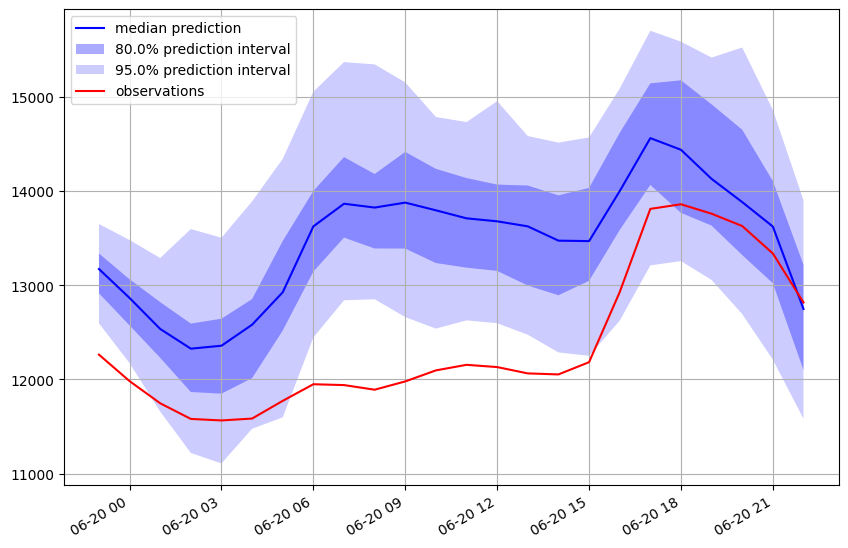

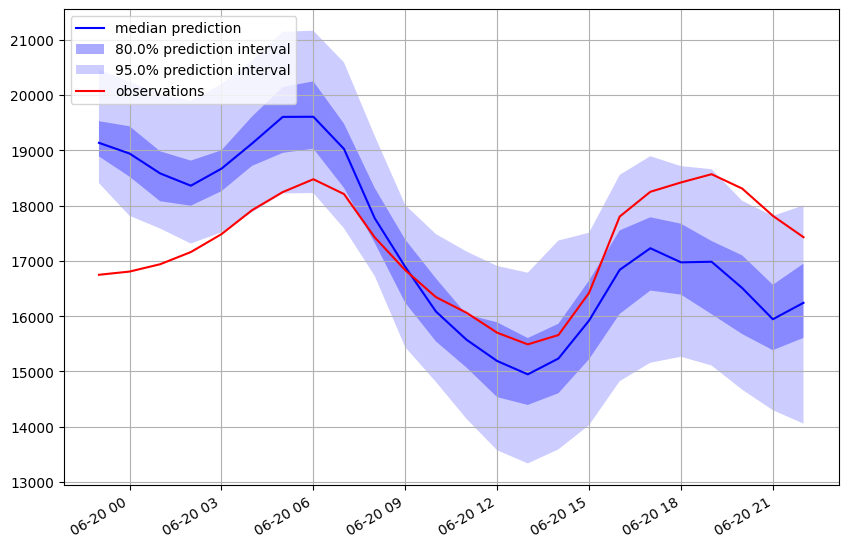

In [31]:
for i in tqdm(range(2)):
    ts_entry = tss[i]
    forecast_entry = forecasts[i]
    plot_prob_forecasts(ts_entry, forecast_entry)
    
    # tss[0], forecasts[0] : COMED data
    # tss[1], forecasts[1] : DOM data

- result
    - The first graph uses COMED data, and the second graph was conducted using DOMED data.As shown in the graph, the conclusion of DeepAR model is confirmed as probability analysis.When reliability is 80% of the case, it was separated by separating the probability distribution of similar tendency when compared to the observed value of the observed value of similar trends.

    - Through this, I think that we can consider statistically uncertainty of DeepAR's advantage of DeepAR.

    - The observer was displayed as red line, and displayed a prediction distribution was displayed in blue.The blue line is predicted central value.